# Import Libraries

In [1]:
# Load general utilities
# ----------------------
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load sklearn utilities
# ----------------------
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Load classifiers
# ----------------
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# PyTorch Libraries
# -----------------
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Other Model Packages
# --------------
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.combine import SMOTEENN
from catboost import CatBoostClassifier

# Other Libraries
# ---------------
import plotly.express as px

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# Load Telco Dataset

In [7]:
filename = 'WA_Fn-UseC_-Telco-Customer-Churn.csv.xls'
df = pd.read_csv(filename)

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [2]:
df2 = pd.read_csv('/Users/lixiaohua/Documents/MSBA/ML2/project/data/telco.csv')

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df2.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [26]:
diff = df2.columns.difference(df.columns)
diff

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'CLTV', 'Churn Category', 'Churn Label', 'Churn Reason', 'Churn Score',
       'City', 'Country', 'Customer ID', 'Customer Status',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Latitude', 'Longitude', 'Married', 'Monthly Charge', 'Multiple Lines',
       'Number of Dependents', 'Number of Referrals', 'Offer', 'Online Backup',
       'Online Security', 'Paperless Billing', 'Payment Method',
       'Phone Service', 'Population', 'Premium Tech Support', 'Quarter',
       'Referred a Friend', 'Satisfaction Score', 'Senior Citizen', 'State',
       'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Refunds', 'Total Revenue',
       'Under 30', 'Unlimited Data', 'Zip Code'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Peform Exploratory Data Analysis (EDA)

### Checking For Null Values

In [5]:
# Create a dataframe showing all null values in the df
df_null = pd.DataFrame(
    {'Count':df.isnull().sum(),
     'Total_Loans':len(df),
     'Percent_Null':100 * df.isnull().sum() / len(df)}
)

# Subset the df_null dataframe to only see columns that 
# contain null values
df_null[df_null['Count'] > 0]

,Count,Total_Loans,Percent_Null


There are no Null values which is fantastic!

In [25]:
df_target = pd.DataFrame(
    {'Count':df['Churn'].value_counts(),
     'target_dist': 100 * df['Churn'].value_counts(normalize=0) / len(df)}
)
df_target

,Count,target_dist
Churn,,
No,5174,73.463013
Yes,1869,26.536987


### Feature Engineering

We'll inspect each feature individually, and do the following:

- Drop the feature if it is not useful for predicting customer churn.
- View summary statistics and visualize the data, plotting against the churn status.
- Modify the feature to make it useful for modeling, if necessary.

In [6]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the Churn status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without churn status
    if continuous:
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with churn status
    if continuous:
        sns.boxplot(x=col_name, y='Churn', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Churn Status')
    else:
        churn_rates = df.groupby(col_name)['Churn'].value_counts(normalize=True).loc[:, 'Yes']
        sns.barplot(x=churn_rates.index, y=churn_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Churn Rate')
        ax2.set_title('Churn Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

#### 1. gender

- Yes: Indicates that the customer is a Male
- No: Indicates that the customer is a Female

In [7]:
df['gender'].value_counts(normalize=False)

gender
Male      3555
Female    3488
Name: count, dtype: int64

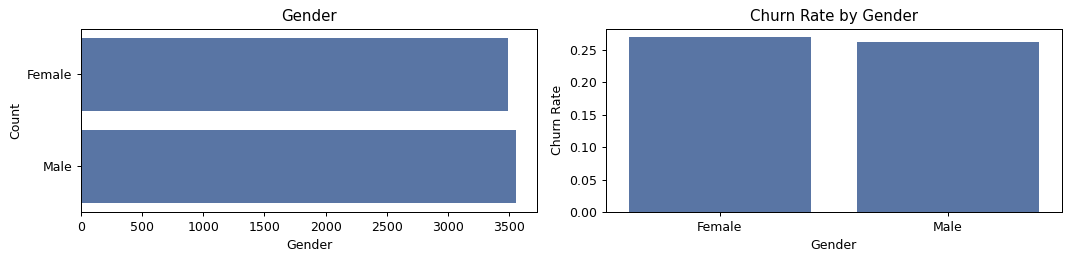

In [8]:
plot_var(col_name='gender', full_name='Gender', continuous=False)

In [9]:
df.groupby('gender')['Churn'].value_counts(normalize=True)

gender  Churn
Female  No       0.730791
        Yes      0.269209
Male    No       0.738397
        Yes      0.261603
Name: proportion, dtype: float64

It appears that the gender column is fairly balanced among genders. I don't see any disparities that exist.

#### 2. SeniorCitizen

- 0: Represents that customer is not a senior citizen
- 1: Represents that customer is a senior citizen

In [10]:
df['SeniorCitizen'].value_counts(normalize=True)

SeniorCitizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64

The data type is integer which may cause some issues with the variable plots. Let's convert this into a boolean.

In [11]:
df['SeniorCitizen'] = np.where(df['SeniorCitizen'] == 1, "Senior_Citizen", 'Not_Senior_Citizen')

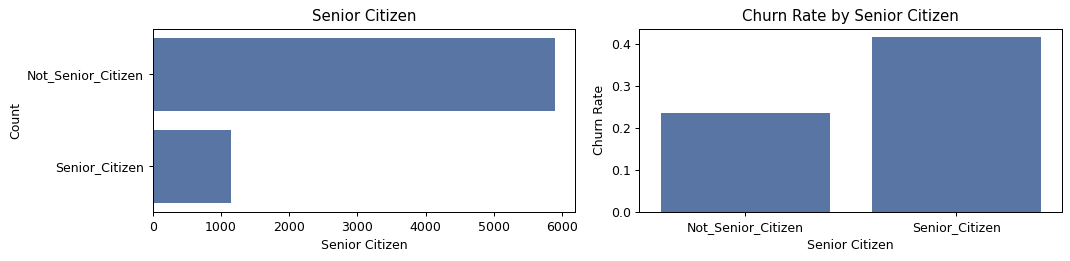

In [12]:
plot_var(col_name='SeniorCitizen', full_name="Senior Citizen", continuous=False)

In [13]:
df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True)

SeniorCitizen       Churn
Not_Senior_Citizen  No       0.763938
                    Yes      0.236062
Senior_Citizen      No       0.583187
                    Yes      0.416813
Name: proportion, dtype: float64

The SeniorCitizen frequencies are quite imbalanced which may cause our models to predict better churn rates on non senior citizen. 

**Note**: The churn rate also increases with Senior Citizens; however, this could simply be due to less sample size causing the senior citizens that do cancel to take up a larger amount proportionally to the whole. 

#### 3. Partner

- Yes: Represents that the customer has a partner
- No: Represents that the customer is single

In [14]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

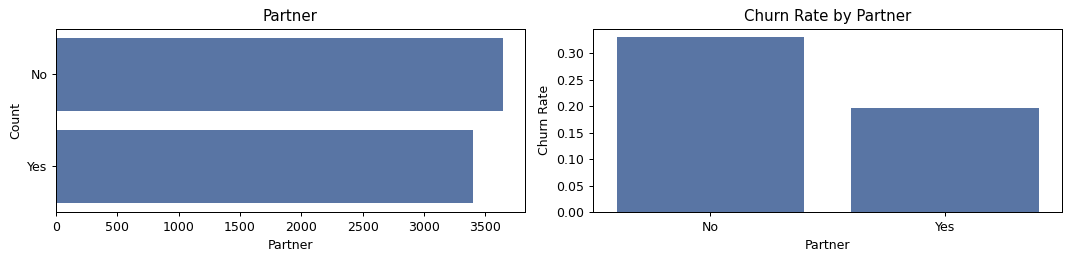

In [15]:
plot_var('Partner', 'Partner', False)

In [16]:
df.groupby('Partner')['Churn'].value_counts(normalize=True)

Partner  Churn
No       No       0.670420
         Yes      0.329580
Yes      No       0.803351
         Yes      0.196649
Name: proportion, dtype: float64

We can see that those who are single tend to churn more often than those without a partner.

#### 4. Dependents

- Yes: Represents customers who have dependents
- No: Represents customers who do not have dependents

In [17]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

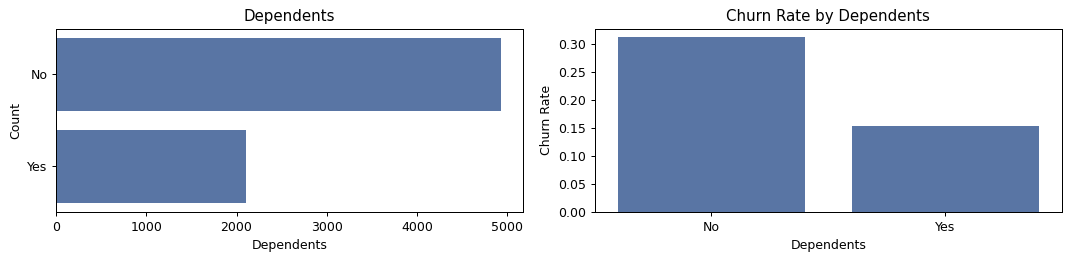

In [18]:
plot_var('Dependents', 'Dependents', False)

In [19]:
df.groupby('Dependents')['Churn'].value_counts(normalize=True)

Dependents  Churn
No          No       0.687209
            Yes      0.312791
Yes         No       0.845498
            Yes      0.154502
Name: proportion, dtype: float64

We can see that churn rates tend to be higher for customers without dependents. 

#### 5. tenure

Number of months the customer has stayed with the company

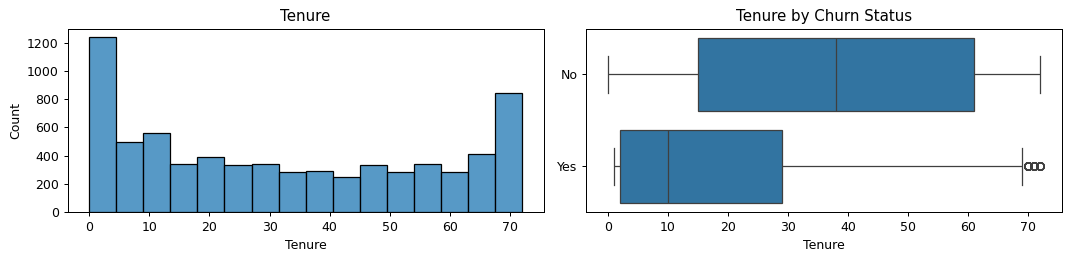

In [20]:
plot_var('tenure', 'Tenure', True)

In [21]:
df.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


As can be seen from the above charts, customers that have stayed with Telco longer tend not to churn. This is very intuitive and the data proves this. 

#### 6. PhoneService

- Yes: Represents that the customer has a phone service.
- No: Represents that the customer does not have a phone service. 

In [22]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

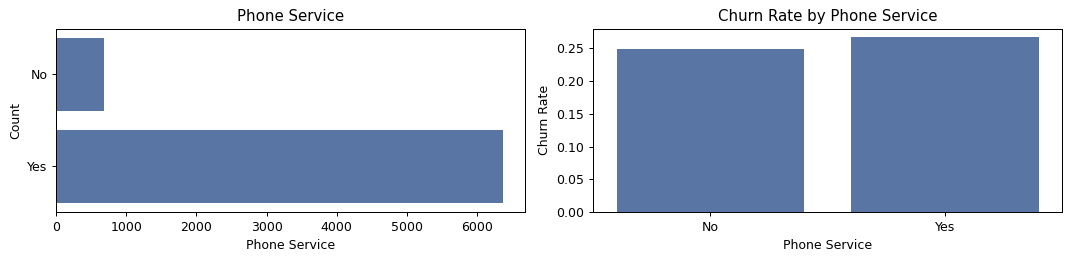

In [23]:
plot_var('PhoneService', 'Phone Service', False)

In [24]:
df.groupby('PhoneService')['Churn'].value_counts(normalize=True)

PhoneService  Churn
No            No       0.750733
              Yes      0.249267
Yes           No       0.732904
              Yes      0.267096
Name: proportion, dtype: float64

We can see that the churn rate by phone service is pretty equal. This means that, at first glance, this doesn't necessarily help us predict churn. 

**Note**: The frequency of customers that have a phone service far outweigh those that do. This is a really imbalanced feature. 

#### 7. MultipleLines

- Yes: Represents that the customer has multiple phone lines
- No: Represents that the customer does not have multiple phone lines
- No phone service: Represents that the customer does not have any phone services

In [25]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

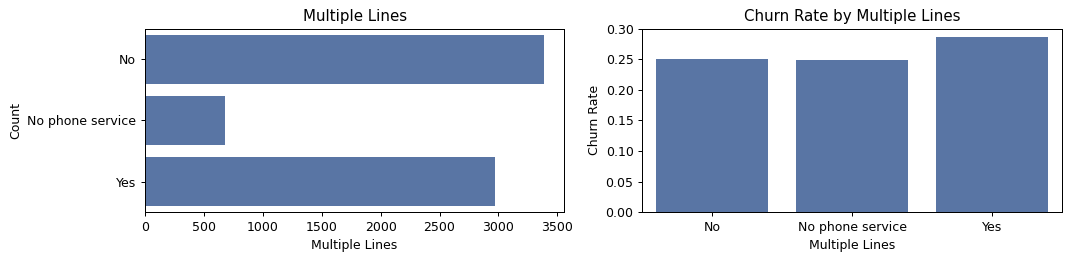

In [26]:
plot_var('MultipleLines', 'Multiple Lines', False)

In [27]:
df.groupby('MultipleLines')['Churn'].value_counts(normalize=True)

MultipleLines     Churn
No                No       0.749558
                  Yes      0.250442
No phone service  No       0.750733
                  Yes      0.249267
Yes               No       0.713901
                  Yes      0.286099
Name: proportion, dtype: float64

The frequency of churn is fairly equal amongst all possible values within MultipleLines. 

**Note**: The frequency of "No Phone Service" customers seems to be very small compared to the other two categories. We could consider transforming this variable into "No" for MultipleLines becuase it would mean something very simlilar. 

#### 8. InternetService

- DSL: Represents a customer who is using a Digital Subscriber Line
- Fiber optic: Represents a customer who is using Fiber Optic service
- No: Represents customers who do not use the Internet Service

In [28]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

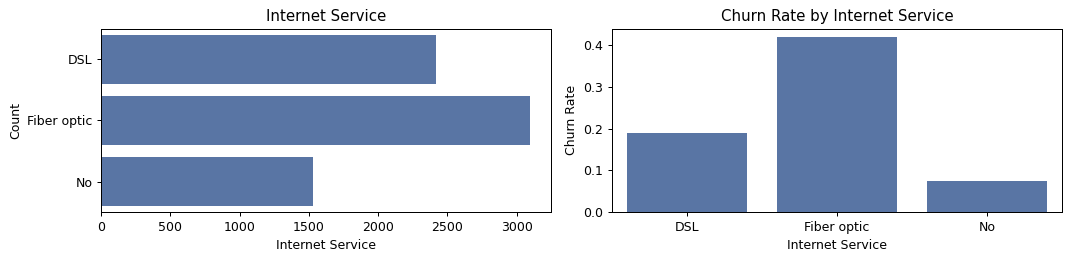

In [29]:
plot_var('InternetService', 'Internet Service', False)

In [30]:
df.groupby('InternetService')['Churn'].value_counts(normalize=True)

InternetService  Churn
DSL              No       0.810409
                 Yes      0.189591
Fiber optic      No       0.581072
                 Yes      0.418928
No               No       0.925950
                 Yes      0.074050
Name: proportion, dtype: float64

The customers that use Fiber optic services tend to churn a lot more than those that do not. This could be very intersting and maybe customers are not satisifed with the fiber optic service that is provided. 

#### 9. OnlineSecurity

- Yes: The customer uses the Online Security Service
- No: The customer does ust the Online Security Service
- No internet service: The customer does not even use the internet service. 

In [31]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

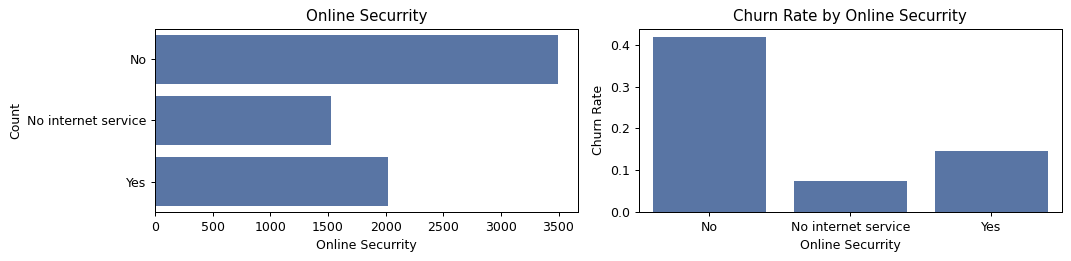

In [32]:
plot_var('OnlineSecurity', 'Online Securrity', False)

In [33]:
df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True)

OnlineSecurity       Churn
No                   No       0.582333
                     Yes      0.417667
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.853888
                     Yes      0.146112
Name: proportion, dtype: float64

It appears that customers who do not use the online security service tend to chrun more than the other categories. 

#### 10. OnlineBackup

- No: Represents customers who do not have Online Backup
- Yes: Represents customers who do have an Online Backup
- No internet service: Represents customers who do have any internet at all

In [34]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

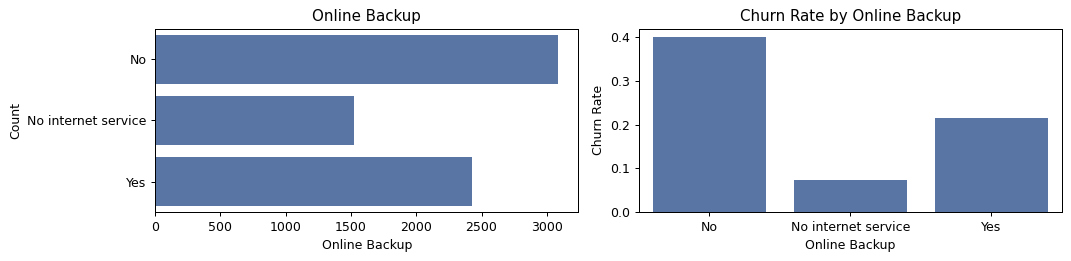

In [35]:
plot_var('OnlineBackup', 'Online Backup', False)

In [36]:
df.groupby('OnlineBackup')['Churn'].value_counts(normalize=True)

OnlineBackup         Churn
No                   No       0.600712
                     Yes      0.399288
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.784685
                     Yes      0.215315
Name: proportion, dtype: float64

Customers who have internet but do not have an online back up tend to churn more than the alternatives. 

#### 11. DeviceProtection

- Yes: Represents customers that have have device protection
- No: Represents customers that do not have device protection
- No internet service: Represents customers who do not have internet services

In [37]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

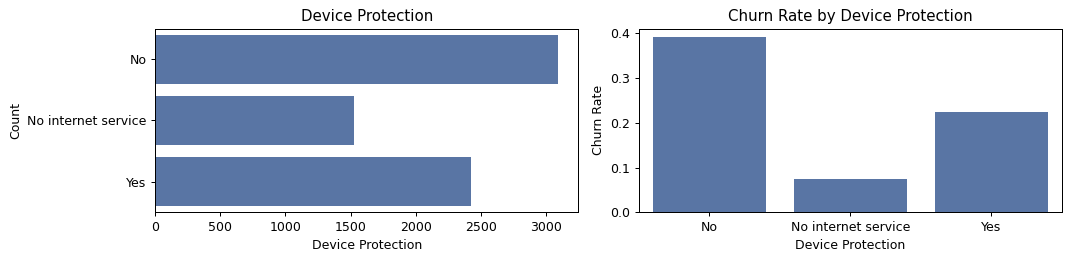

In [38]:
plot_var('DeviceProtection', 'Device Protection', False)

In [39]:
df.groupby('DeviceProtection')['Churn'].value_counts(normalize=True)

DeviceProtection     Churn
No                   No       0.608724
                     Yes      0.391276
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.774979
                     Yes      0.225021
Name: proportion, dtype: float64

We can see that customers who do have internet service, but no device protection tend to churn more than the alternatives. 

#### 12. TechSupport

- Yes: Customers who have tech support services
- No: Customers who do not have tech support services
- No internet service: Customers who do not have any internet service

In [40]:
df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

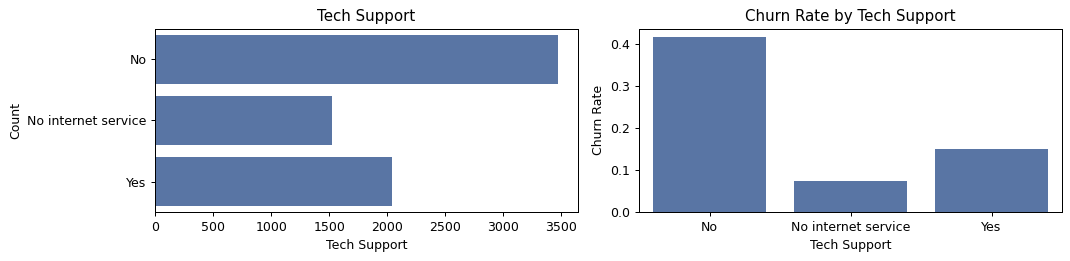

In [41]:
plot_var('TechSupport', 'Tech Support', False)

In [42]:
df.groupby('TechSupport')['Churn'].value_counts(normalize=True)

TechSupport          Churn
No                   No       0.583645
                     Yes      0.416355
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.848337
                     Yes      0.151663
Name: proportion, dtype: float64

We can see that customers who have internet service, but no tech support services tend to churn more than the alternatives. 

#### 13. StreamingTV

- Yes: Customers who have Streaming TV services
- No: Customers who do not have Streaming TV services
- No internet service: Customers who do not have any internet services

In [43]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

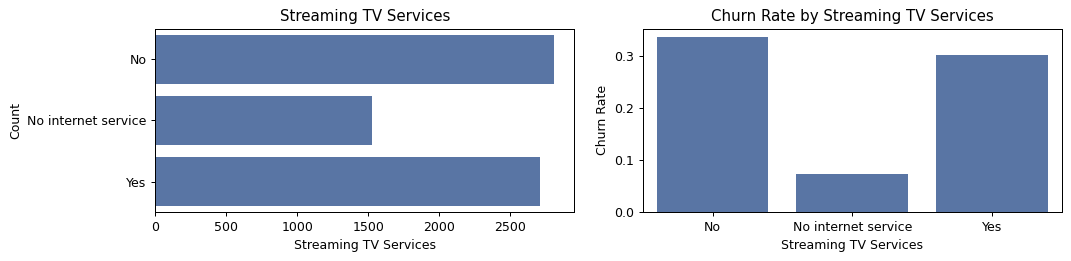

In [44]:
plot_var('StreamingTV', 'Streaming TV Services', False)

In [45]:
df.groupby('StreamingTV')['Churn'].value_counts(normalize=True)

StreamingTV          Churn
No                   No       0.664769
                     Yes      0.335231
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.699298
                     Yes      0.300702
Name: proportion, dtype: float64

We can see that customers who have internet services along with Streaming TV services tned to churn more often than customers who do not have internet services. This could mean that the internet services provided are of poor quality or too expensive compared to competitors. 

#### 14. StreamingMovies

- Yes: Represents customers who have Streaming Movie services
- No: Represents customers who do not have Streaming Movie services
- No internet service: Represents customers who do not have any internet service

In [46]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

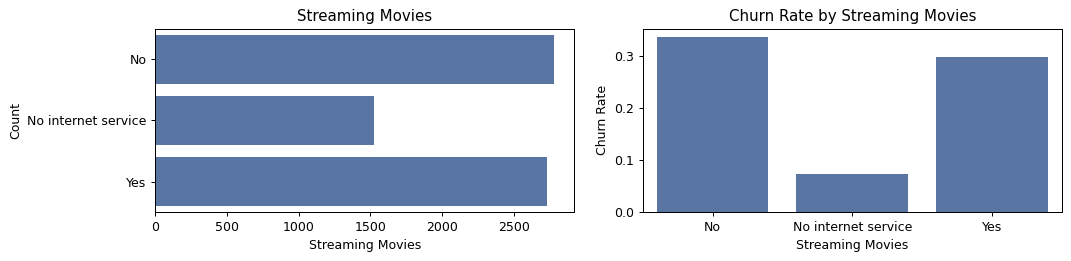

In [47]:
plot_var('StreamingMovies', 'Streaming Movies', False)

In [48]:
df.groupby('StreamingMovies')['Churn'].value_counts(normalize=True)

StreamingMovies      Churn
No                   No       0.663196
                     Yes      0.336804
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.700586
                     Yes      0.299414
Name: proportion, dtype: float64

We can see that customers who have internet services along with Streaming Movie services tned to churn more often than customers who do not have internet services. This could mean that the internet services provided are of poor quality or too expensive compared to competitors. 

#### 15. Contract

- Month-to-month: Represents customers who have a monthly subscription service
- Two year: Represents customers who have a contract for 2 years
- One year: Represents customers who have a contract for 1 year

In [49]:
df['Contract'].value_counts(normalize=True)

Contract
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64

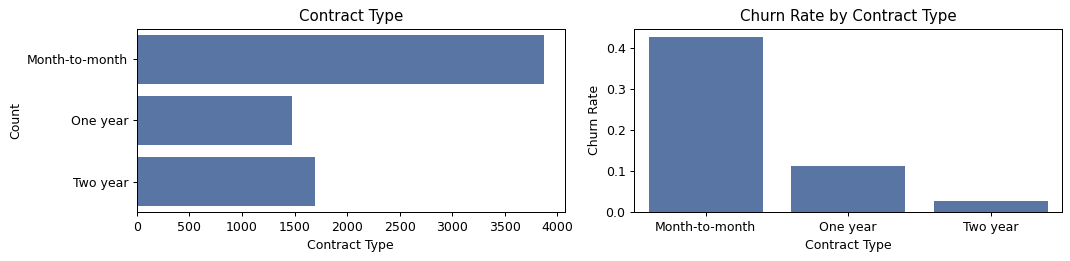

In [50]:
plot_var('Contract', 'Contract Type', False)

In [51]:
df.groupby('Contract')['Churn'].value_counts(normalize=True)

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64

Month-to-month subscription services churn the most proportionally throuhgout the dataset. This makes intutive sense as customers who are monthly can decide to quit this service for a competitor or whatever various reason they choose to leave.

**Note**: Month-to-month customers represent over half the dataset, so this could also lead to higher volume of churn proportional to alternative contract types. 

#### 16. PaperlessBilling

- Yes: Represents the customers who use PaperlessBilling
- No: Represents the customers who do not use PaperlessBilling

In [52]:
df['PaperlessBilling'].value_counts(normalize=True)

PaperlessBilling
Yes    0.592219
No     0.407781
Name: proportion, dtype: float64

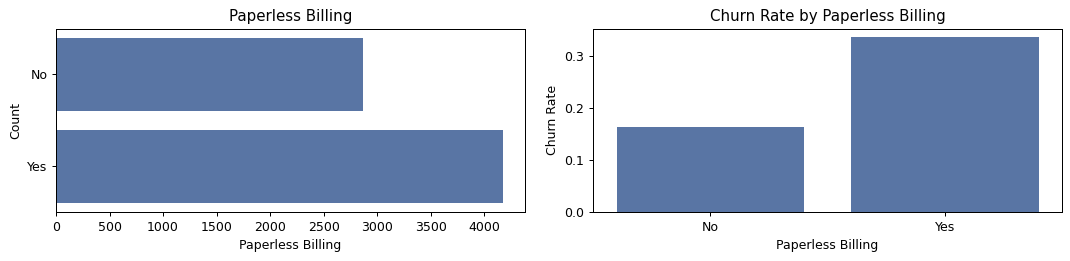

In [53]:
plot_var('PaperlessBilling', 'Paperless Billing', False)

In [54]:
df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True)

PaperlessBilling  Churn
No                No       0.836699
                  Yes      0.163301
Yes               No       0.664349
                  Yes      0.335651
Name: proportion, dtype: float64

Customers who use Paperless Billing tend to churn more oftent than those that do not participate in Paperless Billing.

#### 17. PaymentMethod

- Electronic check: Customers who choose to pay via Electronic check
- Mailed check: Customers who choose to pay via Mailed check
- Bank transfer (automatic): Customers who choose to pay via Bank Transfer (automatic)
- Credit card (automatic): Customers who choose to pay via Credit card (automatic)

In [55]:
df['PaymentMethod'].value_counts(normalize=True)

PaymentMethod
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64

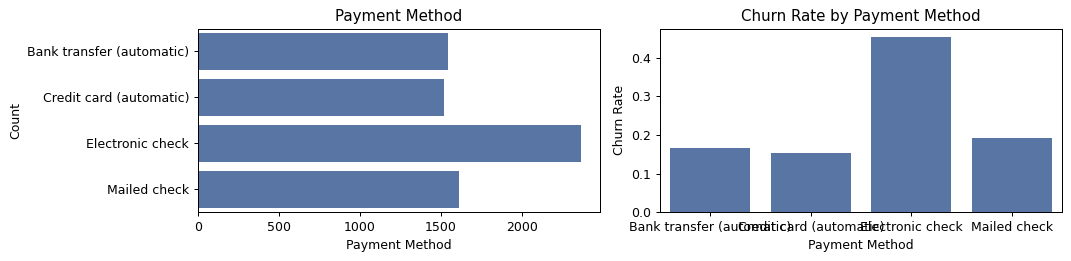

In [56]:
plot_var('PaymentMethod', 'Payment Method', False)

In [57]:
df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True)

PaymentMethod              Churn
Bank transfer (automatic)  No       0.832902
                           Yes      0.167098
Credit card (automatic)    No       0.847569
                           Yes      0.152431
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.808933
                           Yes      0.191067
Name: proportion, dtype: float64

Surprisingly, many customers choose to pay via Electronic check; however, they are the leading payment method regarding churn rate.

#### 18. MonthlyCharges

In [58]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

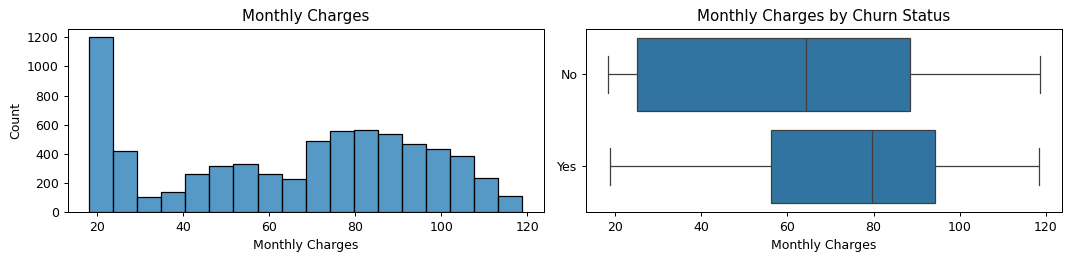

In [59]:
plot_var('MonthlyCharges', 'Monthly Charges', True)

In [60]:
df.groupby('Churn')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


Customers who incure highly Monthly Charges tend to churn more often than customers who pay less monthly. 

#### 19. TotalCharges

In [61]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Need to convert TotalCharges column into float datatype. There are strings in this column that are causing it to be an object datatype. 

In [63]:
# Step 1: Identify non-numeric values in the 'TotalCharges' column
non_numeric_rows = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]

# Display rows with customerID for easy identification
print(non_numeric_rows[['customerID', 'TotalCharges']])

      customerID TotalCharges
488   4472-LVYGI             
753   3115-CZMZD             
936   5709-LVOEQ             
1082  4367-NUYAO             
1340  1371-DWPAZ             
3331  7644-OMVMY             
3826  3213-VVOLG             
4380  2520-SGTTA             
5218  2923-ARZLG             
6670  4075-WKNIU             
6754  2775-SEFEE             


In [64]:
df[['MonthlyCharges', 'tenure', 'TotalCharges']]

,MonthlyCharges,tenure,TotalCharges
0,29.85,1,29.85
1,56.95,34,1889.5
2,53.85,2,108.15
3,42.30,45,1840.75
4,70.70,2,151.65
...,...,...,...
7038,84.80,24,1990.5
7039,103.20,72,7362.9
7040,29.60,11,346.45
7041,74.40,4,306.6


There are a few rows without Total Charges. These values in the column are input as empty strings causing an issue to easily convert column to float datatype. 

Since the amount of rows is so small, we could impute the these empty strings using MonthlyCharges * tenure. This is a logical approach since the total charges a customer incurs would be very closely aligned with how long they have been a customer multiplied by their total monthly charges.

Doing a quick sanity check of MonthlyCharges * tenure, I found that it is a very close approximation, but not always exact. The error in using this calcution is estremaly small and not very meaningful. Also, the amount of rows to impute are very small as well so this shouldn't adversely impact the analysis. 

In [65]:
# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Impute missing TotalCharges as MonthlyCharges * tenure for rows where TotalCharges is NaN
df.loc[df['TotalCharges'].isna(), 'TotalCharges'] = (df['MonthlyCharges'] * df['tenure']).round(2)

# Convert the TotalCharges column to float datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)

df.loc[non_numeric_rows.index, ['customerID', 'MonthlyCharges', 'tenure', 'TotalCharges', 'Churn']]

,customerID,MonthlyCharges,tenure,TotalCharges,Churn
488,4472-LVYGI,52.55,0,0.0,No
753,3115-CZMZD,20.25,0,0.0,No
936,5709-LVOEQ,80.85,0,0.0,No
1082,4367-NUYAO,25.75,0,0.0,No
1340,1371-DWPAZ,56.05,0,0.0,No
3331,7644-OMVMY,19.85,0,0.0,No
3826,3213-VVOLG,25.35,0,0.0,No
4380,2520-SGTTA,20.00,0,0.0,No
5218,2923-ARZLG,19.70,0,0.0,No
6670,4075-WKNIU,73.35,0,0.0,No


It appears that these customers are actually not incurring any charges due to being brand new and not having made a payment at the time of this dataset. Therefore, the TotalCharges will be $0.00. 

In [66]:
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

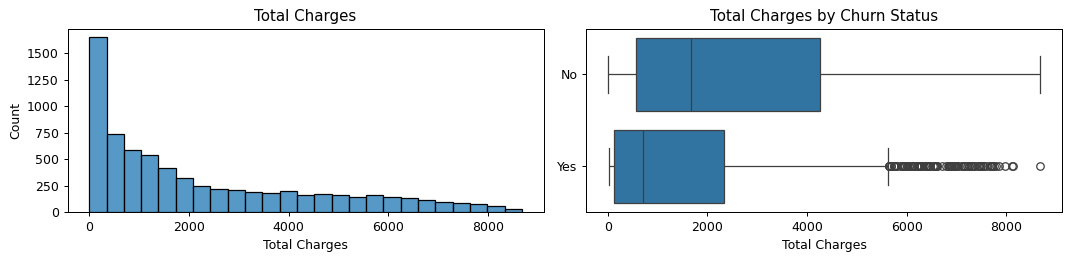

In [67]:
plot_var('TotalCharges', 'Total Charges', True)

In [68]:
df.groupby('Churn')['TotalCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2549.911442,2329.954215,0.00,572.9,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5,703.550,2331.30,8684.80


Customers who churn actually pay less in TotalCharges than cusomters who do not churn. This is the case because tenure plays a role in TotalCharges. The longer the customer stays, the more money they will pay over that time. Since they stay longer, this also results in less churn. 

**Note** The distribution of Churn versus non-Churn customers are exactly the same count as the MonthlyCharges.

#### Churn

In [69]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

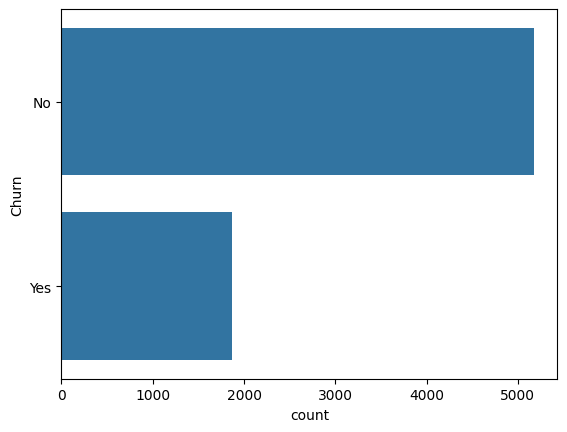

In [70]:
sns.countplot(df['Churn'])
plt.show()

This dataset is comprised of approximately 73% No Churn and the remaining as Churn. This is very unbalanced which means our models will be very good at predicted No Churn. Consequently, our models should be pretty good at predicting Churn as this is a binary outcome. 

# Preparing Data for Machine Learning Models

In [71]:
# Convert Churn into a binary outcome suitable for machine learning models
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [72]:
# Customer ID is not relevant for predicting Churn
df = df.drop(columns='customerID', axis=1).reset_index(drop=True)

In [73]:
# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True, dtype=int)

In [74]:
# Separate features and target
X = df.drop(columns='Churn')
y = df['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

The stratify=y parameter helps to maintain the same proportion of the target variable (Churn) in both the training and test sets.

In [75]:
y_train.value_counts(normalize=True)

Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64

In [76]:
y_test.value_counts(normalize=True)

Churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64

In [77]:
# Initialize scaler
scaler = StandardScaler()

# Fit only on the training set to avoid data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
X_train_scaled

array([[-1.11472828,  0.50428615, -0.83650447, ..., -0.52555704,
         1.40735673, -0.54312331],
       [-1.19588443,  0.72418915, -0.90774191, ..., -0.52555704,
         1.40735673, -0.54312331],
       [-1.19588443,  0.33729214, -0.9095741 , ...,  1.90274305,
        -0.7105519 , -0.54312331],
       ...,
       [ 1.56342466,  1.46491504,  2.3582526 , ..., -0.52555704,
         1.40735673, -0.54312331],
       [-0.34374486, -1.47318743, -0.79351335, ...,  1.90274305,
        -0.7105519 , -0.54312331],
       [-1.07415021, -1.4649204 , -0.95644773, ..., -0.52555704,
        -0.7105519 ,  1.84120252]])

In [99]:
# Apply SMOTEN to the training data
smoten = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoten.fit_resample(X, y)

print(f"X_resampled shape is {X_resampled.shape}")
print(f"y_resampled shape is {y_resampled.shape}")

X_resampled shape is (5834, 30)
y_resampled shape is (5834,)


# Classification Models

#### Most of the structure of this section is inspired by the following Kaggle Notebook:

#### https://www.kaggle.com/code/ahmedashrafahmed/customer-churn-prediction-eda-and-model-98-acc#notebook-container

## Baseline Model Accuracy

Summary and Model Explanation

Here’s a brief overview of each model:

1.	RandomForest: A robust model that builds multiple decision trees and combines their results. It’s usually strong for many datasets because it reduces the risk of overfitting on training data.
2.	XGBoost (Extreme Gradient Boosting): A boosting algorithm that sequentially improves weak models, typically strong for structured/tabular data but requires specific libraries (like libomp) for optimal performance.
3.	LGBM (LightGBM): Similar to XGBoost, this model builds trees for faster and efficient boosting. It’s often faster on larger datasets.
4.	DecisionTree: A simpler model that makes decisions based on if-else rules. It can overfit easily, meaning it may not perform as well on new data.
5.	KNN (K-Nearest Neighbors): A non-parametric model that classifies data based on the most common class among nearest neighbors. KNN is sensitive to how data is scaled.
6.	SVC (Support Vector Classifier): This model tries to find the best boundary between classes. It performs better with fewer features and requires careful parameter tuning.
7.	LogisticRegression: A basic model for binary classification that calculates probabilities for each class. Scaling data and more iterations often help improve its convergence.
8.	CatBoost: Another boosting model specifically optimized for categorical features, which is why it’s performing well.
9.	GradientBoosting and AdaBoost: Both are boosting methods that correct errors from weaker models by adjusting weights or modifying the input data. They’re generally strong choices, particularly for structured data.
10.	NaiveBayes: A probabilistic model often used for text classification. It’s less complex but works well for certain types of data.


In [80]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=42, class_weight='balanced'),
    'LogisticRegression': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    'CatBoost': CatBoostClassifier(logging_level='Silent'),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'NaiveBayes': GaussianNB()
}
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,verbose=0)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 0.7927
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.7822
Cross-validating LGBM...
Mean accuracy for LGBM: 0.7935
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.7302
Cross-validating KNN...
Mean accuracy for KNN: 0.7574
Cross-validating SVC...
Mean accuracy for SVC: 0.6588
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 0.7503
Cross-validating CatBoost...
Mean accuracy for CatBoost: 0.8004
Cross-validating GradientBoosting...
Mean accuracy for GradientBoosting: 0.8030
Cross-validating AdaBoost...
Mean accuracy for AdaBoost: 0.8032
Cross-validating NaiveBayes...
Mean accuracy for NaiveBayes: 0.6633


We are going to add a feed-forward neural networks (FFNNs) as these neural networks are best used with tabular preprocessed data and can detect complex non-linear relationships between variables for increased accuracy in classification tasks. 

Multi-Layer Perceptron (MLP), a type of neural network suitable for tabular data, which will employ forward propagation to learn patterns. We’ll use PyTorch for this implementation, though Keras and TensorFlow are also great options.

- MLPClassifier is a neural network with three fully connected layers (fc1, fc2, and fc3) and ReLU activation functions, which help it learn complex patterns.
- The output layer uses a softmax activation to return probabilities for each class.

In [91]:
# Define the MLP model using PyTorch
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, output_dim=2):
        super(MLPClassifier, self).__init__()
        # Define the network architecture
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x
    
# Convert the data into a PyTorch Dataset
train_data = TensorDataset(torch.FloatTensor(X_train_scaled), torch.LongTensor(y_train.values))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Define a training function
def train_mlp(model, dataloader, epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for data, target in dataloader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(dataloader):.4f}")

# Instantiate and train the model
input_dim = X_train_scaled.shape[1]  # Number of features in your dataset
mlp_model = MLPClassifier(input_dim=input_dim, output_dim=len(set(y_train)))  # Adjust output layer to match classes
train_mlp(mlp_model, train_loader, epochs=10)

# Evaluating the MLP model using cross-validation
def evaluate_mlp(model, X, y):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.FloatTensor(X)
        output = model(X_tensor)
        predictions = torch.argmax(output, dim=1)
    return accuracy_score(y, predictions.numpy())

# Define the training function for MLP
def train_and_evaluate_mlp(X_train, y_train, params):
    # Data preparation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    train_data = TensorDataset(torch.FloatTensor(X_train_scaled), torch.LongTensor(y_train.values))
    train_loader = DataLoader(train_data, batch_size=params['batch_size'], shuffle=True)
    
    # Initialize MLP model
    input_dim = X_train_scaled.shape[1]
    output_dim = len(set(y_train))
    model = MLPClassifier(input_dim=input_dim, hidden_dim=params['hidden_dim'], output_dim=output_dim)
    
    # Define loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])
    
    # Train model
    for epoch in range(params['epochs']):
        model.train()
        total_loss = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
    
    # Evaluation
    model.eval()
    with torch.no_grad():
        X_train_tensor = torch.FloatTensor(X_train_scaled)
        output = model(X_train_tensor)
        predictions = torch.argmax(output, dim=1)
    accuracy = accuracy_score(y_train, predictions.numpy())
    return accuracy, model

# Add MLP to the models dictionary and evaluate
models['MLP'] = mlp_model
cv_results = {}

for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    if model_name == 'MLP':
        # Custom evaluation for MLP
        cv_accuracy = evaluate_mlp(mlp_model, X_train_scaled, y_train)
        cv_results[model_name] = cv_accuracy
        print(f"Mean accuracy for {model_name}: {cv_accuracy:.4f}")
    else:
        # Standard cross-validation for other models
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
        cv_results[model_name] = cv_scores.mean()
        print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Epoch 1/10, Loss: 0.5330
Epoch 2/10, Loss: 0.4998
Epoch 3/10, Loss: 0.4955
Epoch 4/10, Loss: 0.4932
Epoch 5/10, Loss: 0.4913
Epoch 6/10, Loss: 0.4892
Epoch 7/10, Loss: 0.4875
Epoch 8/10, Loss: 0.4880
Epoch 9/10, Loss: 0.4827
Epoch 10/10, Loss: 0.4815
Cross-validating RandomForest...
Mean accuracy for RandomForest: 0.7927
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.7822
Cross-validating LGBM...
Mean accuracy for LGBM: 0.7935
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.7302
Cross-validating KNN...
Mean accuracy for KNN: 0.7574
Cross-validating SVC...
Mean accuracy for SVC: 0.6588
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 0.7503
Cross-validating CatBoost...
Mean accuracy for CatBoost: 0.8004
Cross-validating GradientBoosting...
Mean accuracy for GradientBoosting: 0.8030
Cross-validating AdaBoost...
Mean accuracy for AdaBoost: 0.8032
Cross-validating NaiveBayes...
Mean accuracy for NaiveBayes: 0.6633
Cross-validating ML

As can be seen from the above average accuracy for each model, the MLP model outperforms.

In [ ]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False).reset_index(drop=True)
cv_results_df

,Model,Mean Accuracy
11,MLP,0.833469
9,AdaBoost,0.803245
8,GradientBoosting,0.803043
7,CatBoost,0.800406
2,LGBM,0.793509
0,RandomForest,0.792698
1,XGBoost,0.782150
4,KNN,0.757404
6,LogisticRegression,0.750304
3,DecisionTree,0.730223


In [85]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: MLP


## Optimizing Parameters for Best Cross-Validation Score

##### This next cell takes approximately 25 minutes to run.

The SVC model performs fairly average; however, takes forever to run. So, I omitted it from this iteration. 

In [93]:
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 8, 10, 15],
        'min_samples_split': [5, 10, 15]
    },
    'XGBoost': {
        'max_depth': [1, 3, 5, 7, 10, 20, 30],
        'n_estimators': [50, 100, 200],
        'subsample': [0.6, 0.8, 1],
        'learning_rate': [0.05, 0.1, 0.5,1]
    },
    'LGBM': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20, 30, 40],
        'learning_rate': [0.05, 0.1, 0.5,1]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'CatBoost': {
        'iterations': [100, 200],
        'learning_rate': [0.05, 0.1,.5,1],
        'depth': [6, 10, 15, 20, 25, 30, 40]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1,.5,1],
        'max_depth': [None, 10, 20, 30, 40]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1,.5,1]
    },
    'NaiveBayes': {},
    'MLP': {
    'hidden_dim': [32, 64, 128],
    'num_layers': [1, 2, 3],
    'learning_rate': [0.001, 0.01],
    'batch_size': [16, 32, 64],
    'epochs': [10, 20]  # Adjust based on your training time constraints
}
}

best_results = []

# Existing model tuning with GridSearchCV
for model_name, model in models.items():
    if model_name == 'MLP':
        print(f"\nPerforming GridSearch for {model_name}...")
        best_score = 0
        best_params = None
        
        # Manual grid search for MLP
        for hidden_dim in param_grids['MLP']['hidden_dim']:
            for num_layers in param_grids['MLP']['num_layers']:
                for learning_rate in param_grids['MLP']['learning_rate']:
                    for batch_size in param_grids['MLP']['batch_size']:
                        for epochs in param_grids['MLP']['epochs']:
                            params = {
                                'hidden_dim': hidden_dim,
                                'num_layers': num_layers,
                                'learning_rate': learning_rate,
                                'batch_size': batch_size,
                                'epochs': epochs
                            }
                            print(f"Testing parameters: {params}")
                            accuracy, trained_model = train_and_evaluate_mlp(X_train, y_train, params)
                            
                            if accuracy > best_score:
                                best_score = accuracy
                                best_params = params
                                best_mlp_model = trained_model
                                
        best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
        print(f"Best parameters for {model_name}: {best_params}")
        print(f"Best cross-validation score for {model_name}: {best_score:.4f}")
    elif model_name == 'SVC':
        continue
    else:
        print(f"\nPerforming GridSearchCV for {model_name}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
        print(f"Best parameters for {model_name}: {best_params}")
        print(f"Best cross-validation score for {model_name}: {best_score:.4f}")


Performing GridSearchCV for RandomForest...


Best parameters for RandomForest: {'max_depth': 8, 'min_samples_split': 15, 'n_estimators': 50}
Best cross-validation score for RandomForest: 0.8045

Performing GridSearchCV for XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200, 'subsample': 1}
Best cross-validation score for XGBoost: 0.8055

Performing GridSearchCV for LGBM...
Best parameters for LGBM: {'learning_rate': 0.05, 'max_depth': None, 'n_estimators': 100}
Best cross-validation score for LGBM: 0.8028

Performing GridSearchCV for DecisionTree...
Best parameters for DecisionTree: {'max_depth': 10, 'min_samples_split': 5}
Best cross-validation score for DecisionTree: 0.7659

Performing GridSearchCV for KNN...
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation score for KNN: 0.7684

Performing GridSearchCV for LogisticRegression...


/opt/anaconda3/envs/My/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/My/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/My/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/My/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/My/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/My/lib/python3.8/site-packages/sklearn/linear_mode

Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score for LogisticRegression: 0.7513

Performing GridSearchCV for CatBoost...
Best parameters for CatBoost: {'depth': 6, 'iterations': 100, 'learning_rate': 0.05}
Best cross-validation score for CatBoost: 0.8063

Performing GridSearchCV for GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best cross-validation score for GradientBoosting: 0.7866

Performing GridSearchCV for AdaBoost...
Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
Best cross-validation score for AdaBoost: 0.8055

Performing GridSearchCV for NaiveBayes...
Best parameters for NaiveBayes: {}
Best cross-validation score for NaiveBayes: 0.6633

Performing GridSearch for MLP...
Testing parameters: {'hidden_dim': 32, 'num_layers': 1, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 10}
Testing parameters: {'hidden_di

In [94]:
best_results_df = pd.DataFrame(best_results)
best_results_df = best_results_df.sort_values(by='Best Score', ascending=False)
best_results_df

,Model,Best Score,Best Params
10,MLP,0.861460,"{'hidden_dim': 128, 'num_layers': 2, 'learning..."
6,CatBoost,0.806288,"{'depth': 6, 'iterations': 100, 'learning_rate..."
1,XGBoost,0.805477,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti..."
8,AdaBoost,0.805477,"{'learning_rate': 0.1, 'n_estimators': 200}"
0,RandomForest,0.804462,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
2,LGBM,0.802840,"{'learning_rate': 0.05, 'max_depth': None, 'n_..."
7,GradientBoosting,0.786613,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
4,KNN,0.768357,"{'n_neighbors': 7, 'weights': 'uniform'}"
3,DecisionTree,0.765923,"{'max_depth': 10, 'min_samples_split': 5}"
5,LogisticRegression,0.751318,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline..."


In [ ]:
best_model_name, best_model_param = best_results_df.iloc[0]['Model'], best_results_df.iloc[0]['Best Params']
print(f"\nBest model : {best_model_name}")
print(f"\nBest Parameters : {best_model_param}")


Best model : MLP

Best Parameters : {'hidden_dim': 128, 'num_layers': 2, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 20}


In [100]:
best_model_param

{'hidden_dim': 128,
 'num_layers': 2,
 'learning_rate': 0.001,
 'batch_size': 16,
 'epochs': 20}

## Using the best model to perform confusion matrix, AUC, and Evaluate Metrics

Epoch 1/20, Loss: 0.5165
Epoch 2/20, Loss: 0.4991
Epoch 3/20, Loss: 0.4955
Epoch 4/20, Loss: 0.4932
Epoch 5/20, Loss: 0.4899
Epoch 6/20, Loss: 0.4865
Epoch 7/20, Loss: 0.4837
Epoch 8/20, Loss: 0.4829
Epoch 9/20, Loss: 0.4808
Epoch 10/20, Loss: 0.4768
Epoch 11/20, Loss: 0.4750
Epoch 12/20, Loss: 0.4733
Epoch 13/20, Loss: 0.4733
Epoch 14/20, Loss: 0.4723
Epoch 15/20, Loss: 0.4674
Epoch 16/20, Loss: 0.4662
Epoch 17/20, Loss: 0.4628
Epoch 18/20, Loss: 0.4621
Epoch 19/20, Loss: 0.4585
Epoch 20/20, Loss: 0.4586
Training Accuracy: 0.86
Training Precision: 0.80
Training Recall: 0.61
Training F1-Score: 0.70
---
Test Accuracy: 0.79
Test Precision: 0.64
Test Recall: 0.46
Test F1-Score: 0.53


Confusion Matrix:
 [[1408  144]
 [ 305  256]]


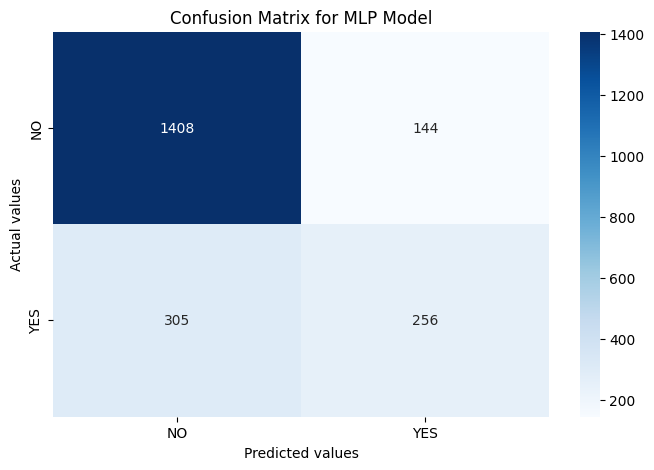

,Training Accuracy,Training Precision,Training Recall,Training F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score
0,0.86,0.8,0.61,0.7,0.79,0.64,0.46,0.53


In [105]:
# Define the MLP model using PyTorch
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, output_dim=2):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Train the MLP model
def train_mlp(model, train_loader, epochs=20, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

# Evaluate the model on training and test sets
def evaluate_mlp(model, X_train_scaled, X_test_scaled, y_train, y_test):
    model.eval()
    with torch.no_grad():
        # Predictions on training data
        train_output = model(torch.FloatTensor(X_train_scaled))
        train_probs = train_output.numpy()
        train_preds = np.argmax(train_probs, axis=1)

        # Predictions on test data
        test_output = model(torch.FloatTensor(X_test_scaled))
        test_probs = test_output.numpy()
        test_preds = np.argmax(test_probs, axis=1)

        # Calculate metrics for training data
        train_accuracy = accuracy_score(y_train, train_preds)
        train_precision = precision_score(y_train, train_preds)
        train_recall = recall_score(y_train, train_preds)
        train_f1 = f1_score(y_train, train_preds)

        # Calculate metrics for test data
        test_accuracy = accuracy_score(y_test, test_preds)
        test_precision = precision_score(y_test, test_preds)
        test_recall = recall_score(y_test, test_preds)
        test_f1 = f1_score(y_test, test_preds)

        # Display metrics
        print(f"Training Accuracy: {train_accuracy:.2f}")
        print(f"Training Precision: {train_precision:.2f}")
        print(f"Training Recall: {train_recall:.2f}")
        print(f"Training F1-Score: {train_f1:.2f}")
        print("---")
        print(f"Test Accuracy: {test_accuracy:.2f}")
        print(f"Test Precision: {test_precision:.2f}")
        print(f"Test Recall: {test_recall:.2f}")
        print(f"Test F1-Score: {test_f1:.2f}")

        metric_df = pd.DataFrame({
            'Training Accuracy':round(train_accuracy, 2),
            'Training Precision':round(train_precision, 2),
            'Training Recall':round(train_recall, 2),
            'Training F1-Score':round(train_f1, 2),
            'Test Accuracy':round(test_accuracy, 2),
            'Test Precision':round(test_precision, 2),
            'Test Recall':round(test_recall, 2),
            'Test F1-Score':round(test_f1, 2)
        }, index=[0])

        # AUC and ROC for test set
        test_roc_auc = roc_auc_score(y_test, test_probs[:, 1])
        fpr, tpr, thresholds = roc_curve(y_test, test_probs[:, 1])
        roc_data = {
            'False Positive Rate': fpr,
            'True Positive Rate': tpr
        }
        fig = px.line(
            roc_data, 
            x='False Positive Rate', 
            y='True Positive Rate',
            title=f'ROC Curve (AUC = {test_roc_auc:.2f})',
            labels={'x': 'False Positive Rate', 'y': 'True Positive Rate'},
            width=800,
            height=600
        )
        fig.add_shape(
            type='line', 
            x0=0, y0=0, x1=1, y1=1,
            line=dict(color='red', dash='dash')
        )
        fig.update_layout(
            title_font=dict(size=20, color='mediumorchid'),
            title_x=0.5,
            xaxis=dict(showgrid=True, zeroline=True),
            yaxis=dict(showgrid=True, zeroline=True),
            template='plotly_dark'
        )
        fig.show()

        # Confusion Matrix for test set
        cm = confusion_matrix(y_test, test_preds)
        print('Confusion Matrix:\n', cm)
        plt.figure(figsize=(8, 5))
        sns.heatmap(data=cm, annot=True, fmt='g', cmap="Blues", xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
        plt.xlabel('Predicted values')
        plt.ylabel('Actual values')
        plt.title('Confusion Matrix for MLP Model')
        plt.show()

    return metric_df

# Data preparation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare the dataset and dataloader for PyTorch
train_data = TensorDataset(torch.FloatTensor(X_train_scaled), torch.LongTensor(y_train.values))
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)

# Initialize the MLP model with optimal parameters and train
mlp_model = MLPClassifier(input_dim=X_train.shape[1], hidden_dim=128, output_dim=len(set(y_train)))
train_mlp(mlp_model, train_loader, epochs=20, learning_rate=0.001)

# Evaluate the trained MLP model
evaluate_mlp(mlp_model, X_train_scaled, X_test_scaled, y_train, y_test)

## Applying SMOTEN to training set

This is used to balance out the classes.

In [106]:
best_results = []

# Existing model tuning with GridSearchCV
for model_name, model in models.items():
    if model_name == 'MLP':
        print(f"\nPerforming GridSearch for {model_name}...")
        best_score = 0
        best_params = None
        
        # Manual grid search for MLP
        for hidden_dim in param_grids['MLP']['hidden_dim']:
            for num_layers in param_grids['MLP']['num_layers']:
                for learning_rate in param_grids['MLP']['learning_rate']:
                    for batch_size in param_grids['MLP']['batch_size']:
                        for epochs in param_grids['MLP']['epochs']:
                            params = {
                                'hidden_dim': hidden_dim,
                                'num_layers': num_layers,
                                'learning_rate': learning_rate,
                                'batch_size': batch_size,
                                'epochs': epochs
                            }
                            print(f"Testing parameters: {params}")
                            accuracy, trained_model = train_and_evaluate_mlp(X_resampled, y_resampled, params)
                            
                            if accuracy > best_score:
                                best_score = accuracy
                                best_params = params
                                best_mlp_model = trained_model
                                
        best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
        print(f"Best parameters for {model_name}: {best_params}")
        print(f"Best cross-validation score for {model_name}: {best_score:.4f}")
    elif model_name == 'SVC':
        continue
    else:
        print(f"\nPerforming GridSearchCV for {model_name}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
        grid_search.fit(X_resampled, y_resampled)
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
        print(f"Best parameters for {model_name}: {best_params}")
        print(f"Best cross-validation score for {model_name}: {best_score:.4f}")


Performing GridSearchCV for RandomForest...
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score for RandomForest: 0.9503

Performing GridSearchCV for XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score for XGBoost: 0.9556

Performing GridSearchCV for LGBM...
Best parameters for LGBM: {'learning_rate': 1, 'max_depth': None, 'n_estimators': 200}
Best cross-validation score for LGBM: 0.9570

Performing GridSearchCV for DecisionTree...
Best parameters for DecisionTree: {'max_depth': 10, 'min_samples_split': 2}
Best cross-validation score for DecisionTree: 0.9357

Performing GridSearchCV for KNN...
Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score for KNN: 0.9820

Performing GridSearchCV for LogisticRegression...


/opt/anaconda3/envs/My/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/My/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/My/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/My/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/My/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/My/lib/python3.8/site-packages/sklearn/linear_mode

Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score for LogisticRegression: 0.9383

Performing GridSearchCV for CatBoost...
Best parameters for CatBoost: {'depth': 6, 'iterations': 200, 'learning_rate': 0.5}
Best cross-validation score for CatBoost: 0.9501

Performing GridSearchCV for GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}
Best cross-validation score for GradientBoosting: 0.9551

Performing GridSearchCV for AdaBoost...
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Best cross-validation score for AdaBoost: 0.9455

Performing GridSearchCV for NaiveBayes...
Best parameters for NaiveBayes: {}
Best cross-validation score for NaiveBayes: 0.9056

Performing GridSearch for MLP...
Testing parameters: {'hidden_dim': 32, 'num_layers': 1, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 10}
Testing parameters: {'hidden_dim': 

In [107]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
11,MLP,0.831440
9,AdaBoost,0.803245
8,GradientBoosting,0.803043
7,CatBoost,0.800406
2,LGBM,0.793509
0,RandomForest,0.792698
1,XGBoost,0.782150
4,KNN,0.757404
6,LogisticRegression,0.750304
3,DecisionTree,0.730223


In [108]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: MLP


Epoch 1/20, Loss: 0.4032
Epoch 2/20, Loss: 0.3800
Epoch 3/20, Loss: 0.3757
Epoch 4/20, Loss: 0.3719
Epoch 5/20, Loss: 0.3717
Epoch 6/20, Loss: 0.3700
Epoch 7/20, Loss: 0.3680
Epoch 8/20, Loss: 0.3663
Epoch 9/20, Loss: 0.3656
Epoch 10/20, Loss: 0.3649
Epoch 11/20, Loss: 0.3641
Epoch 12/20, Loss: 0.3623
Epoch 13/20, Loss: 0.3635
Epoch 14/20, Loss: 0.3616
Epoch 15/20, Loss: 0.3611
Epoch 16/20, Loss: 0.3606
Epoch 17/20, Loss: 0.3599
Epoch 18/20, Loss: 0.3590
Epoch 19/20, Loss: 0.3595
Epoch 20/20, Loss: 0.3585
Training Accuracy: 0.95
Training Precision: 0.96
Training Recall: 0.96
Training F1-Score: 0.96
---
Test Accuracy: 0.77
Test Precision: 0.55
Test Recall: 0.79
Test F1-Score: 0.65


Confusion Matrix:
 [[1190  362]
 [ 120  441]]


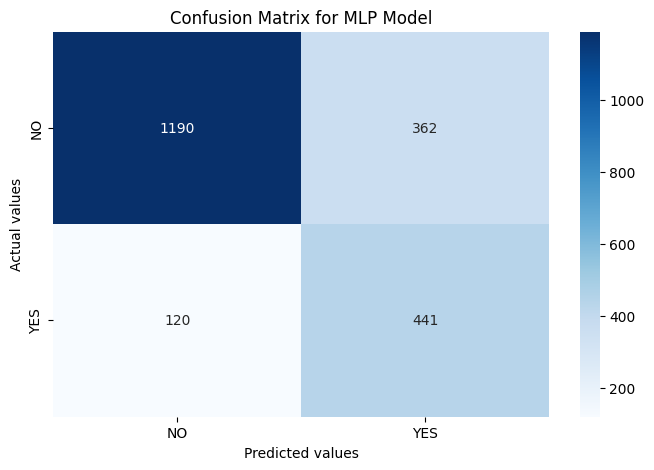

,Training Accuracy,Training Precision,Training Recall,Training F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score
0,0.95,0.96,0.96,0.96,0.77,0.55,0.79,0.65


In [109]:
# Data preparation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Prepare the dataset and dataloader for PyTorch
train_data = TensorDataset(torch.FloatTensor(X_train_scaled), torch.LongTensor(y_resampled.values))
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)

# Initialize the MLP model with optimal parameters and train
mlp_model = MLPClassifier(input_dim=X_resampled.shape[1], hidden_dim=128, output_dim=len(set(y_resampled)))
train_mlp(mlp_model, train_loader, epochs=20, learning_rate=0.001)

# Evaluate the trained MLP model
evaluate_mlp(mlp_model, X_train_scaled, X_test_scaled, y_resampled, y_test)